# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [116]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    #stop adding cities once greater than or equal to 300 is reached 
    # if len(cities) >= 10:
    #     break    
    if len(cities) >= 300:
        break
          
    
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 300


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [117]:
###Checking to review data in json file 
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create endpoint URL with each 
city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

# Parse the JSON and retrieve data    
city_weather = requests.get(city_url).json()

# Pretty Print the output of the JSON
print(json.dumps(city_weather, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 6.7989,
        "lon": 81.4808
    },
    "dt": 1730327880,
    "id": 1224061,
    "main": {
        "feels_like": 77.18,
        "grnd_level": 995,
        "humidity": 89,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 75.72,
        "temp_max": 75.72,
        "temp_min": 75.72
    },
    "name": "Wattegama",
    "sys": {
        "country": "LK",
        "sunrise": 1730334064,
        "sunset": 1730376850
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 247,
        "gust": 1.99,
        "speed": 2.21
    }
}


In [118]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid={API key}&units=imperial
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "imperial"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our city_data list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    #if i is a mulitple of 50 AND is greateer than or equal to 50
        #then set_count increases by 1
        #then record_count is reset to 0 at the start of each new set
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each 
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    #print(requests.get(url)) 

    
    # Log the url, record, and set numbers
    #%s = placeholders
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa


Processing Record 2 of Set 1 | rehoboth
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | zakharivka
Processing Record 7 of Set 1 | olyokminsk
Processing Record 8 of Set 1 | miyako
Processing Record 9 of Set 1 | choele choel
Processing Record 10 of Set 1 | basoko
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | jeddah
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | magadan
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | coxen hole
Processing Record 19 of Set 1 | bandon
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | geraldton
Processing Record 23 of Set 1 | grytviken
Processing Record 24 of Set 1 | blackmans bay
Processing Record 25 

In [119]:
#city_data

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          287
Lat           287
Lng           287
Max Temp      287
Humidity      287
Cloudiness    287
Wind Speed    287
Country       287
Date          287
dtype: int64

In [120]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lagoa,39.0500,-27.9833,66.87,85,13,21.94,PT,1730327880
1,rehoboth,-23.3167,17.0833,63.79,24,0,2.37,NA,1730327881
2,port mathurin,-19.6833,63.4167,73.56,67,82,16.55,MU,1730327821
3,lihue,21.9789,-159.3672,81.99,71,75,20.71,US,1730327883
4,avarua,-21.2078,-159.7750,78.85,69,93,16.11,CK,1730327884


In [121]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [122]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.head()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagoa,39.0500,-27.9833,66.87,85,13,21.94,PT,1730327880
1,rehoboth,-23.3167,17.0833,63.79,24,0,2.37,NaN,1730327881
2,port mathurin,-19.6833,63.4167,73.56,67,82,16.55,MU,1730327821
3,lihue,21.9789,-159.3672,81.99,71,75,20.71,US,1730327883
4,avarua,-21.2078,-159.7750,78.85,69,93,16.11,CK,1730327884
...,...,...,...,...,...,...,...,...,...
282,lichinga,-13.3128,35.2406,69.53,38,56,6.15,MZ,1730328203
283,klyuchi,52.2667,79.1667,31.87,71,23,7.45,RU,1730328204
284,afaahiti,-17.7500,-149.2833,73.20,71,80,15.26,PF,1730328207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

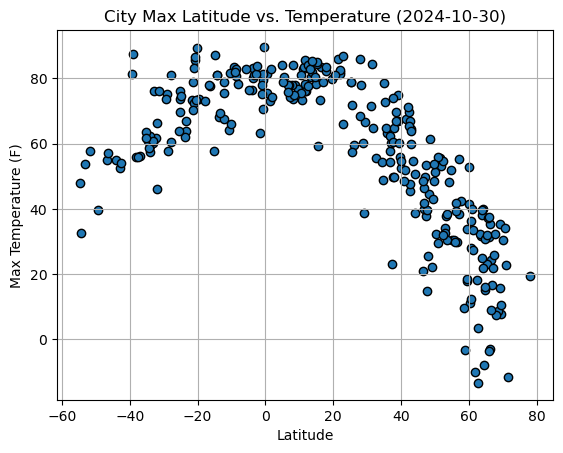

In [123]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude,temperature, edgecolors = "black")

#Incorporate the other graph properties
#%s = placeholder - strftime "%x" is used for the local format of current date
#plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

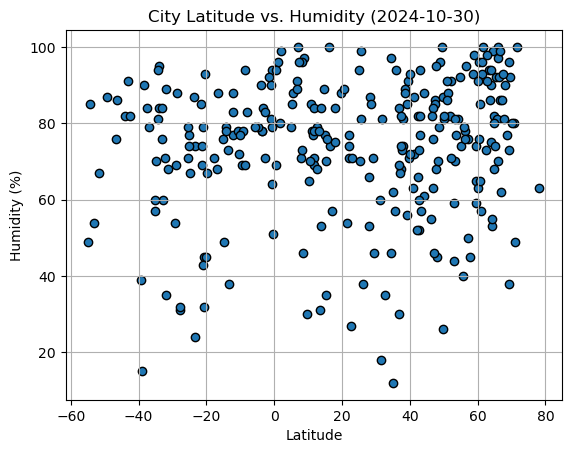

In [124]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(latitude,humidity, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

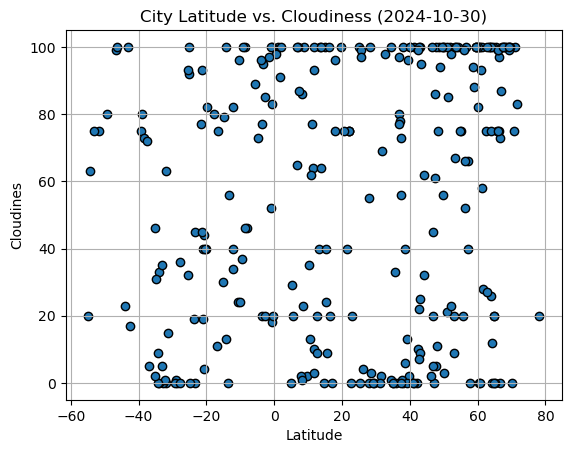

In [125]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(latitude,cloudiness, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudines")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

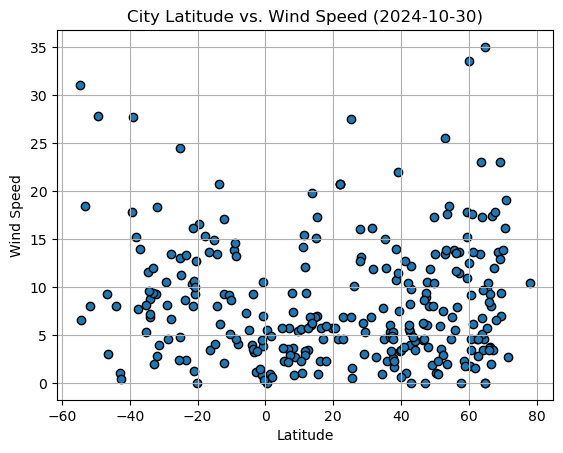

In [126]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

plt.scatter(latitude,wind, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #calculate regression values
    regress_values = x_values * slope + intercept
    
    #equation of the regression line as a string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    #scatter plot 
    plt.scatter(x_values, y_values)
    
    #plot regression red line 
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.xlabel("Latitude")
    plt.title(title)
    print(f"The r^2-value: {rvalue**2}")
    plt.show()   

In [140]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0 )]

# Display sample data
northern_hemi_df.head()
#northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagoa,39.0500,-27.9833,66.87,85,13,21.94,PT,1730327880
3,lihue,21.9789,-159.3672,81.99,71,75,20.71,US,1730327883
5,zakharivka,47.3333,29.7500,53.42,86,86,8.97,UA,1730327886
6,olyokminsk,60.3736,120.4264,10.99,96,100,1.74,RU,1730327887
7,miyako,39.6367,141.9525,55.87,71,2,3.29,JP,1730327888


In [139]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0 )]

# Display sample data
southern_hemi_df.head()
#southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rehoboth,-23.3167,17.0833,63.79,24,0,2.37,NaN,1730327881
2,port mathurin,-19.6833,63.4167,73.56,67,82,16.55,MU,1730327821
4,avarua,-21.2078,-159.7750,78.85,69,93,16.11,CK,1730327884
8,choele choel,-39.2667,-65.6833,81.41,39,75,17.83,AR,1730327889
10,port-aux-francais,-49.3500,70.2167,39.49,87,80,27.83,TF,1730327806


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value: 0.7430883228140345


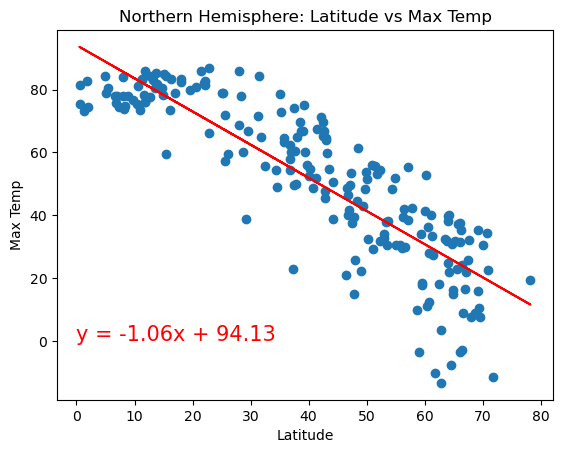

In [130]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Latitude vs Max Temp", (0,0))

The r^2-value: 0.5009362408450743


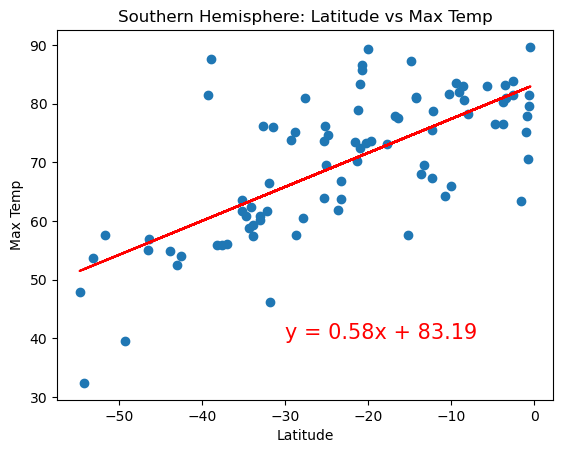

In [131]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Latitude vs Max Temp", (-30, 40))

**Discussion about the linear relationship:**

#Temperature vs. Latitude Linear Regression Plot
1. Northern Hemisphere
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.74 represents a strong positive correlation between latitude and the maximum temperature, which suggests a linear relationship that indicates as latitude increases further north (away from 0) the maximum temperature tends to decrease. 
* The linear regression line illustrates a negative downwared slope of -1.06 indicating a negative correlation and that the temperature typically drops as latitude increases. The closeness of the data points to the line suggests that latitude is a significant predictor of temperate.    

2. Southern Hemisphere 
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.50 represents a moderate positive correlation between latitude and the maximum temperature, which suggests a weak linear relationship that indicates as the latitude approaches 0 toward the equator the maximum temperature tends to increase. 
* The linear regression line illustrates a positive upward slope of 0.58 indicating that the temperature typically increases as latitude decreases. The wide spread of the data points to the line suggests that latitude influences the temperature some although other variables outside of latitude may influence the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value: 0.009060686289198762


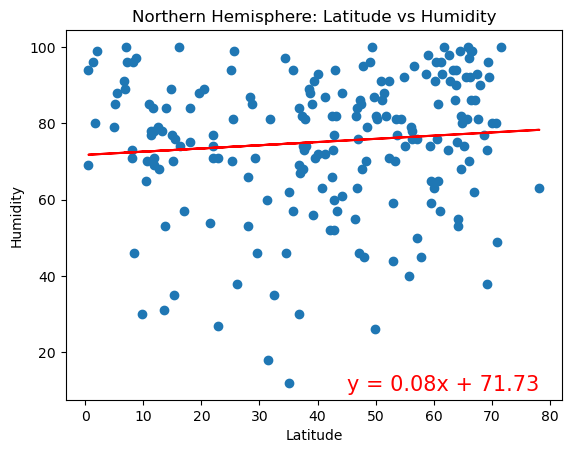

In [132]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Latitude vs Humidity", (45, 10))

The r^2-value: 0.021155169241184695


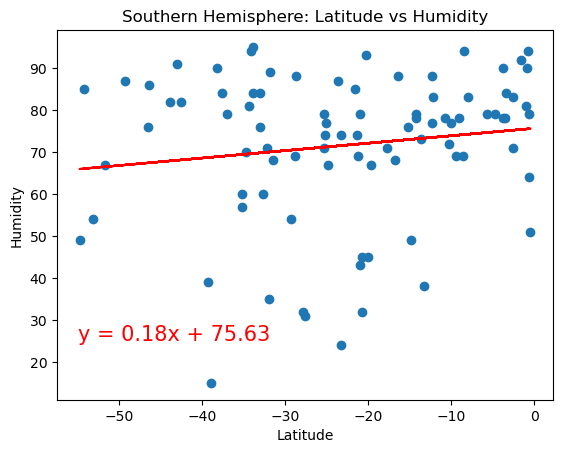

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Latitude vs Humidity", (-55, 25))

**Discussion about the linear relationship:** 

#Humidity vs. Latitude Linear Regression Plot
1. Northern Hemisphere
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.009 represents a very weak correlation between latitude and humidity, which suggests a weak linear relationship that indicates that latitude may not be the only indicator of the humidity.  
* The linear regression line illustrates a slight upward positive slope of 0.08 indicating that latitude has minimal impact on humidity. The wide spread of the data points around the line suggests that other variables outside of latitude may infludence the humidity. 

2. Southern Hemisphere 
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.021 represents a very weak correlation between latitude and humidity, which suggests a weak linear relationship that indicates that latitude may not be the only indicator of the humidity. 
* The linear regression line illustrates a slight positive upward slope of 0.18 indicating that there is a slight increase in humidity as latitude approaches 0 toward the equator. The wide spread of the data points around the line suggests that other variables outside of latitude may influence the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value: 0.02238184842970939


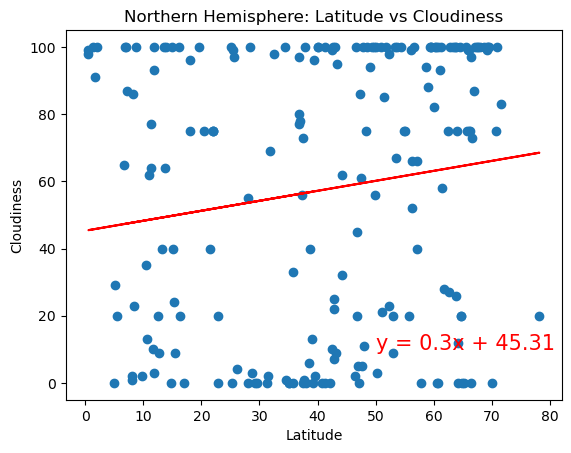

In [134]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Latitude vs Cloudiness", (50, 10))

The r^2-value: 0.029224517378121338


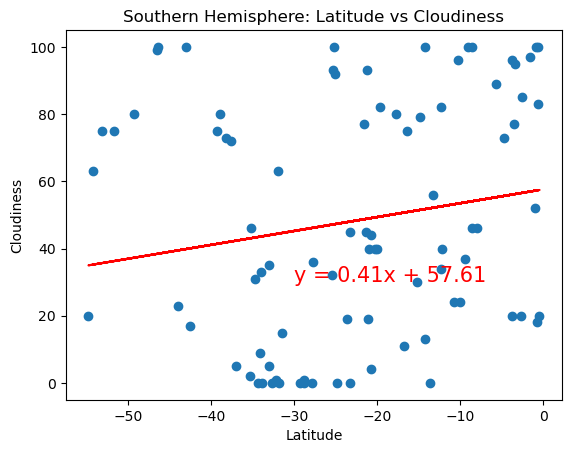

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Latitude vs Cloudiness", (-30, 30))

**Discussion about the linear relationship:**

#Cloudiness vs. Latitude Linear Regression Plot
1. Northern Hemisphere
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.022 represents a very weak correlation between latitude and cloudiness, which suggests latitude has minimal impact on cloudiness. 
* The linear regression line illustrates a slight positive upward slope of 0.3 indicating a slight increase in cloudiness as latitude increases. The wide spread of the data points around the line suggests that other variables outside of latitude may influence the cloudiness. 

2. Southern Hemisphere 
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.029 represents a very weak correlation between latitude and cloudiness, which suggests that other variables outside of latitude may influence the cloudiness. 
* The linear regression line illustrates a positive upward slope of 0.41 indicating that as as lattitude approaches the equator, 0, cloudiness increases. The wide spread of the data points around the line suggests that other variables outside of latitude may influence the cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value: 0.04370364983927109


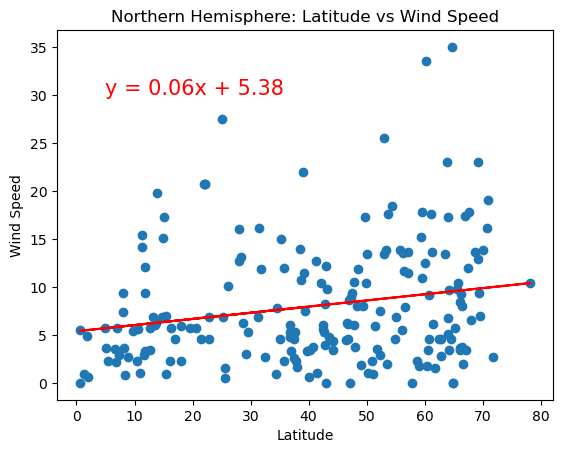

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Latitude vs Wind Speed", (5, 30))

The r^2-value: 0.10617813991536008


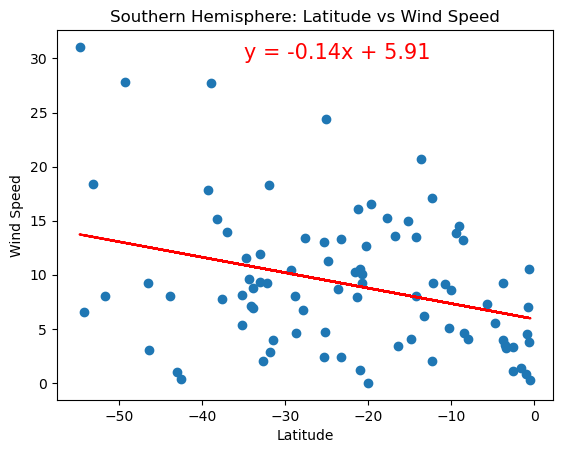

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Latitude vs Wind Speed", (-35, 30))

**Discussion about the linear relationship:** 

#Wind Speed vs. Latitude Linear Regression Plot
1. Northern Hemisphere
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.043 represents a very weak correlation between latitude and wind speed, which suggests latitude has very little impact on wind speed. 
* The linear regression line illustrates a slight positive upward slope of 0.06 indicating a slight increase in wind speed as latitude increases. The wide spread of the data points around the line suggests that other variables outside of latitude may influence the wind speed. 

2. Sourthern Hemisphere 
* Using Pearson's Correlation Coefficient, the absolute value of r = 0.106 represents a weak correlation between latitude and wind speed, which suggests that latitude may not be the only indicator of the wind speed. 
* The linear regression line illustrates a downward slope of -0.14 indicating that there is a slight decrease in wind speed as latigude approaches 0 toward the equator. The wide spread of the data points around the line suggests that other variables outside of latitude may influence the wind speed. 